<a href="https://colab.research.google.com/github/loki20051267/NLP/blob/main/5th_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports + Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# **TF-IDF + Train/Test Split**

In [2]:
# Load dataset (replace with your CSV path)
df = pd.read_csv("tweets.csv")

X = df["text"]
y = df["target"]

# TF-IDF
tfidf = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


# **Train Logistic Regression**

In [3]:
lr = LogisticRegression(max_iter=200, class_weight="balanced")
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1851
           1       0.58      0.75      0.66       423

    accuracy                           0.85      2274
   macro avg       0.76      0.81      0.78      2274
weighted avg       0.87      0.85      0.86      2274



# **Top Features Driving Predictions**

In [4]:
feature_names = np.array(tfidf.get_feature_names_out())
coeffs = lr.coef_[0]

# Top 20 for disaster (positive coeffs) and non-disaster (negative coeffs)
top_pos_idx = np.argsort(coeffs)[-20:]
top_neg_idx = np.argsort(coeffs)[:20]

print("Top Disaster-related words:")
print(feature_names[top_pos_idx])

print("\nTop Non-disaster-related words:")
print(feature_names[top_neg_idx])


Top Disaster-related words:
['reported' 'earthquake' 'innocent' 'injury' 'hit' 'bus' 'british'
 'warning' 'australia' 'sinkhole' 'ukrainian' 'volcano' 'rescued' 'road'
 'died' 'killed' 'windstorm' 'train' 'collision' 'thunderstorm']

Top Non-disaster-related words:
['like' 'don' 'love' 'want' 'heart' 'think' 'sure' 'did' 've' 'let'
 'america' 'thing' 'make' 'feel' 'battle' 'eyewitness' 'real' 'tell'
 'support' 'wasn']


# **Visualization (Word Cloud / Bar Chart)**

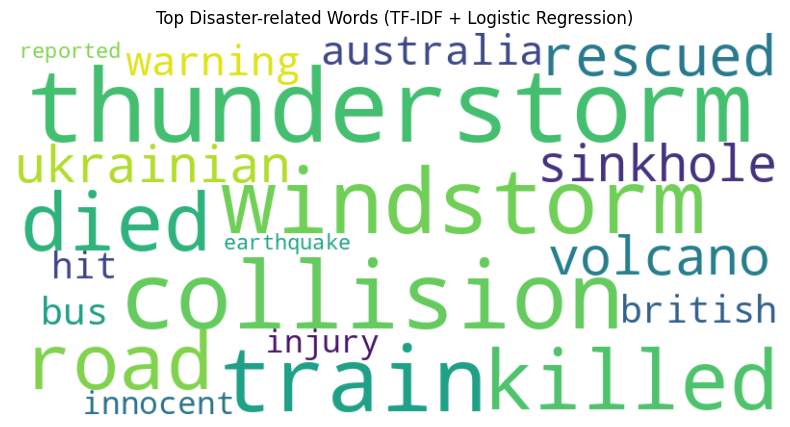

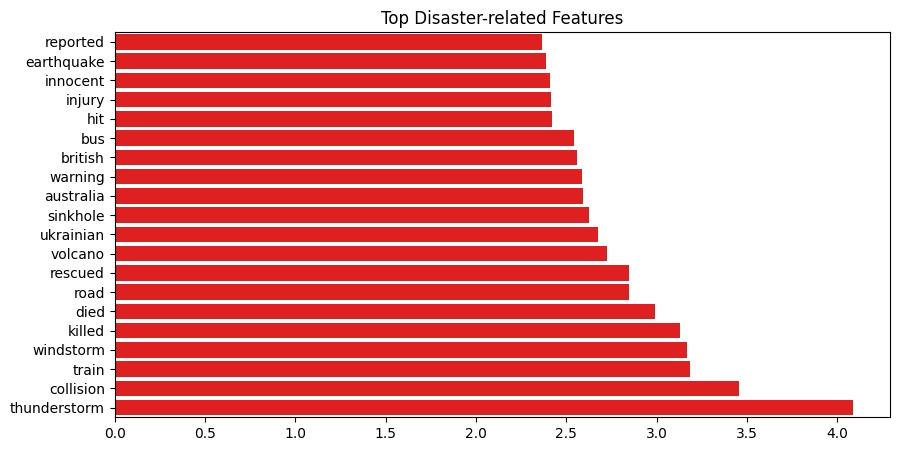

In [5]:
# Word cloud of disaster-related terms
disaster_words = dict(zip(feature_names[top_pos_idx], coeffs[top_pos_idx]))

wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(disaster_words)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top Disaster-related Words (TF-IDF + Logistic Regression)")
plt.show()

# Bar chart alternative
plt.figure(figsize=(10,5))
sns.barplot(x=coeffs[top_pos_idx], y=feature_names[top_pos_idx], color="red")
plt.title("Top Disaster-related Features")
plt.show()


# **Train Other Models (RF, DT)**

In [6]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

# Evaluate all
evaluate_model("Logistic Regression", y_test, y_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)



Logistic Regression Performance:
Accuracy: 0.8527
Precision: 0.5800
Recall: 0.7541
F1 Score: 0.6557

Decision Tree Performance:
Accuracy: 0.8285
Precision: 0.5372
Recall: 0.5626
F1 Score: 0.5497

Random Forest Performance:
Accuracy: 0.8782
Precision: 0.7920
Recall: 0.4681
F1 Score: 0.5884
